In [1]:
#import packages
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

In [2]:
#import the data files
df = pd.read_csv('../data/2017_diabetes_cleaned_vld.csv')


In [3]:
X = df[['bmi', 'physhlth', 'menthlth', 'michd', 'hchol', 'hblpr', 'vpa', 
        'hvdr', 'smok', 'incom50', 'cllgr','sex', 'age65']]   # independent variables
y = df['diabete']   # dependent variable 

#splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


### Bootstrap Aggregating/ Bagging Classifier

In [4]:
tree = DecisionTreeClassifier()
bagging_classifier = BaggingClassifier(base_estimator = tree, n_estimators = 1000, random_state = 42)
bagging_classifier.fit(X_train, y_train)
y_pred = bagging_classifier.predict(X_test)

In [5]:
conf_matrix_bagging = confusion_matrix(y_test, y_pred)
print(conf_matrix_bagging)

[[43113  2182]
 [ 6191  1344]]


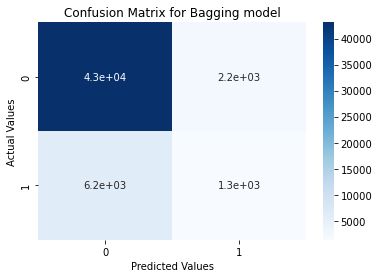

In [6]:
ax = sns.heatmap(conf_matrix_bagging, annot = True, cmap = 'Blues')

ax.set_title('Confusion Matrix for Bagging model')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
plt.show()

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:' ,accuracy)

Accuracy: 0.8415105053946621


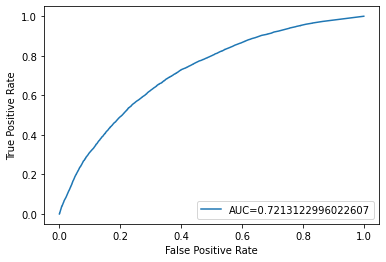

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score
#define metrics
y_pred_prob = bagging_classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

#Create ROC curve
plt.plot(fpr,tpr, label ="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Random Forest Classifier

In [10]:
#Random Forest Model
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [11]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix_rf)

[[42986  2309]
 [ 6201  1334]]


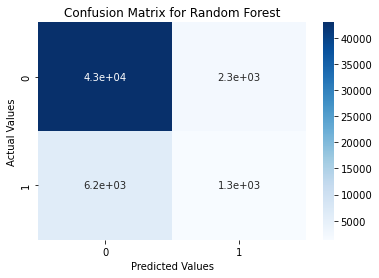

In [12]:
ax1 = sns.heatmap(conf_matrix_rf, annot = True, cmap = 'Blues')

ax1.set_title('Confusion Matrix for Random Forest')
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
plt.show()

In [13]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy:' ,accuracy_rf)

Accuracy: 0.8389172818474352


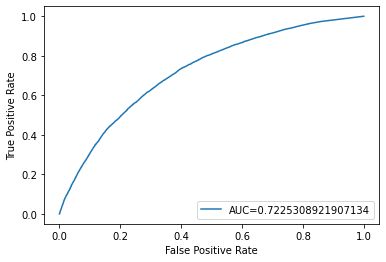

In [15]:
#define metrics
y_pred_prob_rf = rf.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

#Create ROC curve
plt.plot(fpr_rf,tpr_rf, label ="AUC="+str(auc_rf))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Gradient Boosting Classifier

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
#Gradient Boosting Classifier
boosting_classifier = GradientBoostingClassifier(learning_rate = 0.05, n_estimators = 1000)
boosting_classifier.fit(X_train, y_train)
y_pred_boosting = boosting_classifier.predict(X_test)